<a href="https://colab.research.google.com/github/terryljh/aviation2/blob/main/asrs%20data%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# @title
#collect all csvs in one list to read them all into one dataframe
csv_urls = [
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/january2005-june2005.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/july2005-march2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/april2006-november2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2006-august2007.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2007-may2008.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2008-february2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2009-november2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2009-august2010.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2010-may2011.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2011-february2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2012-november2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2012-august2013.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2013-may2014.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2014-april2015.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2015-january2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/february2016-december2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/january2017-november2017.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2017-october2018.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/november2018-july2019.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/august2019-may2020.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2020-april2021.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2021-apr2022.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2022-mar2023.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2023-mar2024.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv']


In [85]:
#this code usually takes about 15-30 seconds to read in all csv's
df = pd.concat([pd.read_csv(url) for url in csv_urls], ignore_index=True)
pd.set_option('display.max_columns', None)
df.head(7)

,,Time,Time.1,Place,Place.1,Place.2,Place.3,Place.4,Place.5,Place.6,Environment,Environment.1,Environment.2,Environment.3,Environment.4,Environment.5,Aircraft 1,Aircraft 1.1,Aircraft 1.2,Aircraft 1.3,Aircraft 1.4,Aircraft 1.5,Aircraft 1.6,Aircraft 1.7,Aircraft 1.8,Aircraft 1.9,Aircraft 1.10,Aircraft 1.11,Aircraft 1.12,Aircraft 1.13,Aircraft 1.14,Aircraft 1.15,Aircraft 1.16,Aircraft 1.17,Aircraft 1.18,Aircraft 1.19,Aircraft 1.20,Aircraft 1.21,Aircraft 1.22,Aircraft 1.23,Aircraft 1.24,Aircraft 1.25,Aircraft 1.26,Aircraft 1.27,Aircraft 1.28,Aircraft 1.29,Aircraft 1.30,Aircraft 1.31,Aircraft 1.32,Aircraft 1.33,Aircraft 1.34,Component,Component.1,Component.2,Component.3,Aircraft 2,Aircraft 2.1,Aircraft 2.2,Aircraft 2.3,Aircraft 2.4,Aircraft 2.5,Aircraft 2.6,Aircraft 2.7,Aircraft 2.8,Aircraft 2.9,Aircraft 2.10,Aircraft 2.11,Aircraft 2.12,Aircraft 2.13,Aircraft 2.14,Aircraft 2.15,Aircraft 2.16,Aircraft 2.17,Aircraft 2.18,Aircraft 2.19,Aircraft 2.20,Aircraft 2.21,Aircraft 2.22,Aircraft 2.23,Aircraft 2.24,Aircraft 2.25,Aircraft 2.26,Aircraft 2.27,Aircraft 2.28,Aircraft 2.29,Aircraft 2.30,Aircraft 2.31,Aircraft 2.32,Aircraft 2.33,Aircraft 2.34,Person 1,Person 1.1,Person 1.2,Person 1.3,Person 1.4,Person 1.5,Person 1.6,Person 1.7,Person 1.8,Person 1.9,Person 1.10,Person 2,Person 2.1,Person 2.2,Person 2.3,Person 2.4,Person 2.5,Person 2.6,Person 2.7,Person 2.8,Person 2.9,Person 2.10,Events,Events.1,Events.2,Events.3,Events.4,Events.5,Assessments,Assessments.1,Report 1,Report 1.1,Report 2,Report 2.1,Report 1.2,Unnamed: 125
0,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On B...,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authori...,Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On B...,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authori...,Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person,Location In Aircraft,Repor

In [86]:
# @title
new_headers = df.iloc[0] #dataset has headers, then the first row is the actual headings,
#so we want to replace headers with the first row new_headers

# Make the headers unique, in case some are repeated, function relabels 2,3 etc
#The ASRS occasionally has multiple reports for a single incident
#If we want to include second,third reports in our data, we need to include the
#second version of those columns too, but for simplicity maybe we only take the
#first report of each incident for now?
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row
df

,ACN,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Airspace Authorization Provider (UAS),Operating Under Waivers / Exemptions / Authorizations (UAS),Waivers / Exemptions / Authorizations (UAS),Airworthiness Certification (UAS),Weight Category (UAS),Configuration (UAS),Flight Operated As (UAS),Flight Operated with Visual Observer (UAS),Control Mode (UAS),Flying In / Near / Over (UAS),Passenger Capable (UAS),Type (UAS),Number of UAS Being Controlled (UAS),Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory_1,Aircraft Operator_1,Make Model Name_1,Aircraft Zone_1,Crew Size_1,Operating Under FAR Part_1,Flight Plan_1,Mission_1,Nav In Use_1,Flight Phase_1,Route In Use_1,Airspace_1,Maintenance Status.Maintenance Deferred_1,Maintenance Status.Records Complete_1,Maintenance Status.Released For Service_1,Maintenance Status.Required / Correct Doc On Board_1,Maintenance Status.Maintenance Type_1,Maintenance Status.Maintenance Items Involved_1,Cabin Lighting_1,Number Of Seats.Number_1,Passengers On Board.Number_1,Crew Size Flight Attendant.Number Of Crew_1,Airspace Authorization Provider (UAS)_1,Operating Under Waivers / Exemptions / Authorizations (UAS)_1,Waivers / Exemptions / Authorizations (UAS)_1,Airworthiness Certification (UAS)_1,Weight Category (UAS)_1,Configuration (UAS)_1,Flight Operated As (UAS)_1,Flight Operated with Visual Observer (UAS)_1,Control Mode (UAS)_1,Flying In / Near / Over (UAS)_1,Passenger Capable (UAS)_1,Type (UAS)_1,Number of UAS Being Controlled (UAS)_1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,UAS Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person_1,Location In Aircraft_1,Reporter Organization_1,Function_1,Qualification_1,Experience_1,Cabin Activity_1,Human Factors_1,Communication Breakdown_1,UAS Communication Breakdown_1,ASRS Report Number.Accession Number_1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative_1,Callback_1,Synopsis,NaN
0,641722,200501,1801-2400,ZZZ.Airport,US,NaN,NaN,0,NaN,NaN,VMC,Fog; 5,NaN,Night,900,NaN,Tower ZZZ.Tower,Air Carrier,Regional Jet 200 ER/LR (CRJ200),NaN,2,Part 121,IFR,Passenger,NaN,Takeoff / Launch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nosewheel Steering,NaN,X,Malfunctioning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aircraft X,NaN,Air Carrier,Pilot Not Flying; Captain,NaN,Flight Crew Last 90 Days 240; Flight Crew Tota...,NaN,NaN,NaN,NaN,641722,Aircraft X,NaN,Air Carrier,Pilot Flying; First Officer,NaN,Flight Crew Last 90 Days 120; Flight Crew Tota...,NaN,NaN,NaN,NaN,641721,Aircraft Equipment Problem Critical,NaN,NaN,Automation Aircraft Other Automation; Person F...,NaN,Flight Crew Diverted; Flight Crew Overcame Equ...,Aircraft; Human Factors,Aircraft,DURING TAXI TO RWY FOR TKOF; NOTHING UNUSUAL O...,NaN,NaN,NaN,A CL65 ON TKOF CLB AT 2000 FT DIVERTED DUE TO ...,NaN
1,641728,200501,0001-0600

In [88]:
dfsubset = df[['Date', 'Locale Reference', 'State Reference', 'Operating Under FAR Part','Mission','Light', 'Flight Phase','Function', 'Contributing Factors / Situations', 'Primary Problem']]
dfsubset

,Date,Locale Reference,State Reference,Operating Under FAR Part,Mission,Light,Flight Phase,Function,Contributing Factors / Situations,Primary Problem
0,200501,ZZZ.Airport,US,Part 121,Passenger,Night,Takeoff / Launch,Pilot Not Flying; Captain,Aircraft; Human Factors,Aircraft
1,200501,ZZZ.Airport,US,Part 121,Passenger,Night,Initial Approach,Dispatcher,Environment - Non Weather Related; Company Pol...,Aircraft
2,200501,SFO.Airport,CA,Part 121,Passenger,Night,Taxi,Ground,Airport,Airport
3,200501,PHD.Airport,OH,Part 91,Personal,Daylight,Cruise,Single Pilot; Pilot Flying,Human Factors; Airspace Structure,NaN
4,200501,ZZZ.Airport,US,Part 121,Passenger,NaN,Descent,Pilot Flying; Captain,Aircraft,Aircraft
...,...,...,...,...,...,...,...,...,...,...
106586,202503,CAE.Airport,SC,NaN,NaN,Night,Taxi,First Officer,Airport; Human Factors,Airport
106587,202503,IAH.Airport,TX,Part 121,Passenger,NaN,Final Approach,Captain; Pilot Not Flying,Human Factors,Human Factors
106588,202503,NaN,NaN,Part 121,NaN,NaN,Parked,Technician,Aircraft; Manuals; Procedure,Aircraft
106589,202503,ZZZ.Airport,US,Part 121,Passenger,NaN,Climb,Captain; Pilot Flying,Aircraft; Human Factors,Aircraft


In [20]:
#this block of code just tests some data cleaning on a smaller subset
df = pd.read_csv('https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv')
df = df.drop(df.columns[0], axis=1)
df = df.reset_index(drop=True)

#testing change to see if edits on collab can be passed to github

#The column headings are not descriptive, and more descriptive column headings are in the zeroth row,
# so we replace the column headings with the entries of the zeroth row, and remove the zeroth row.
new_headers = df.iloc[0]

# Make the headers unique, in case some are repeated, we need to relabel 2,3 etc
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row

df['Date']= df['Date'].values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will remove NaN

def months_since_jan_2024(yyyymm):
    year = yyyymm // 100
    month = yyyymm % 100
    # Calculate months since 2024-01
    return (year - 2024) * 12 + (month - 1)
df['Date'] = df['Date'].apply(months_since_jan_2024) #change date yyyymm to months since Jan 2024
df = df[(df['Date'] >= 3) & (df['Date'] <= 24)] #removes anomolous dates that are in by mistake, should only be April 2024-May 2025

vc_df = df['Date'].value_counts().reset_index()
vc_df = vc_df.sort_values('Date')
vc_df.columns = ['Months after January 2024', 'Number of accidents in month']
vc_df
df

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Latitude / Longitude (UAS),Flight Conditions,...,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative_1,Callback_1,Synopsis,NaN
1,3,1801-2400,ZZZ.ARTCC,US,NaN,NaN,NaN,NaN,NaN,NaN,...,In-flight,Air Traffic Control Issued New Clearance; Flig...,Aircraft,Aircraft,At the lower base of windshield; small electri...,NaN,During cruise at FL370; small electrical spark...,NaN,B787 flight crew reported the cockpit windshie...,NaN
2,3,0601-1200,ZZZ.Airport,US,NaN,NaN,NaN,NaN,NaN,VMC,...,In-flight,Air Traffic Control Issued Advisory / Alert; F...,Human Factors; Software and Automation,Ambiguous,VFR night into ZZZ. ATC cleared us for the vis...,NaN,NaN,NaN,Air carrier Captain reported the autopilot des...,NaN
3,3,0601-1200,ORD.Airport,IL,NaN,NaN,0,NaN,NaN,NaN,...,Taxi,NaN,Airport,Airport,Taxi instructions from Gate XX. [Taxiway] U2; ...,NaN,NaN,NaN,Air carrier Captain reported signage at ORD wa...,NaN
4,3,0601-1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,In-flight,Flight Crew Overcame Equipment Problem,ATC Equipment / Nav Facility / Buildings; Airc...,Ambiguous,Saw the following message from the crew to Mai...,NaN,NaN,NaN,Dispatcher reported observing a flight crew me...,NaN
5,3,1801-2400,ZZZ.Airport,US,NaN,NaN,0,NaN,NaN,VMC,...,In-flight,Flight Crew Requested ATC Assistance / Clarifi...,Airport; Procedure,Procedure,First leg of OE (Operating Experience) for bra...,NaN,We were on [runway] XXR with instructions to l...,NaN,B737 flight crew reported critical ground conf...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710,14,1201-1800,CAE.Airport,SC,NaN,NaN,0,NaN,NaN,NaN,...,Taxi,NaN,Airport; Human Factors,Airport,Runway 29/11 is under construction at CAE and ...,NaN,NaN,NaN,Light transport First Officer reported being c...,NaN
4711,14,NaN,IAH.Airport,TX,NaN,NaN,NaN,1700,NaN,VMC,...,In-flight,General None Reported / Taken,Human Factors,Human Factors,On approach into IAH-established on the visual...,NaN,At approximately 7 mile final at 1700' on a vi...,NaN,Air carrier flight crew reported an NMAC with ...,NaN
4712,14,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,Routine Inspection,General Maintenance Action,Aircraft; Manuals; Procedure,Aircraft,We are continuing to see more aircraft with th...,NaN,NaN,NaN,B787-10 Technician reported seeing deteriorati...,NaN
4713,14,1201-1800,ZZZ.Airport,US,NaN,NaN,100,NaN,NaN,VMC,...,In-flight,Flight Crew Overcame Equipment Problem; Genera...,Aircraft; Human Factors,Aircraft,Landing gear failed to retract after takeoff. ...,Reporter stated aircraft type was B737-800.,NaN,NaN,B737-800 Captain reported the landing gear fai...,NaN


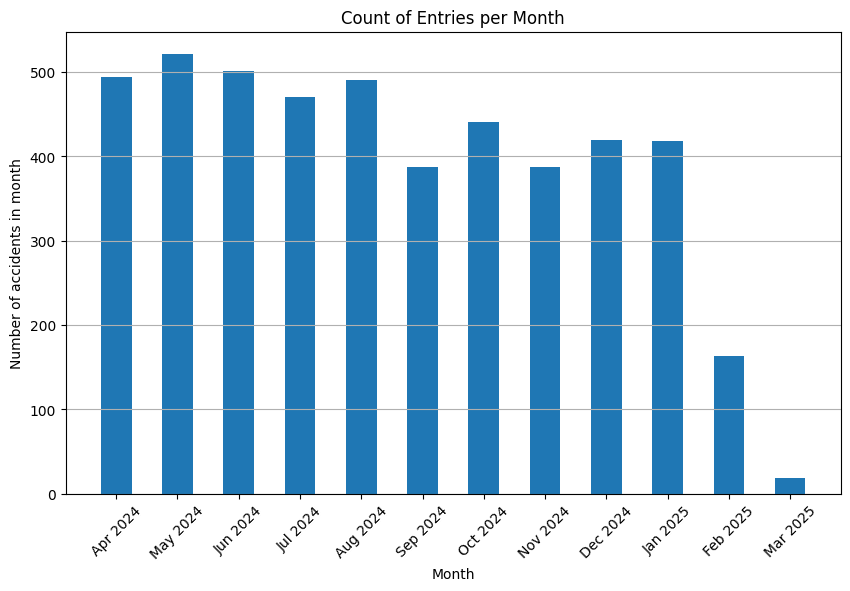

In [ ]:
vc_df['Month_Label'] = vc_df['Months after January 2024'].apply(
    lambda x: pd.to_datetime('2024-01-01') + pd.DateOffset(months=x)
).dt.strftime('%b %Y')
#convert months after Jan 2024 back to actual month for plotting


plt.figure(figsize=(10,6))
plt.bar(vc_df['Month_Label'], vc_df['Number of accidents in month'], width=0.5)
plt.xlabel('Month')
plt.ylabel('Number of accidents in month')
plt.title('Count of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()